In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
import skbio
from collections import *
from statistics import *
import random
import scipy
from itertools import permutations

Read and preprocess the data

In [2]:
nodes = pd.read_csv("node.csv")
nodes.index = np.arange(1, len(nodes) + 1)
nodes['group'].fillna('Unknown', inplace=True)
print("Original number of total nodes:",len(nodes))

G_wet =  nx.DiGraph()
G_wet.add_nodes_from(nodes["node_id"])

nx.set_node_attributes(G_wet, nodes["name"], "name")
nx.set_node_attributes(G_wet, nodes["group"], "group")

print(len(G_wet))

G_dry = nx.DiGraph()
G_dry.add_nodes_from(nodes["node_id"])

nx.set_node_attributes(G_dry, nodes["name"], "name")
nx.set_node_attributes(G_dry, nodes["group"], "group")

print(len(G_dry))
print('\n')

edges_wet = pd.read_csv("edge_wet.csv")
print(len(edges_wet))

weighted_e_wet = list(edges_wet.itertuples(index=False, name=None))
print(len(weighted_e_wet))
nx.DiGraph()
G_wet.add_weighted_edges_from(weighted_e_wet)  
print("Original number of G_wet edges:",len(G_wet.edges))
#G_wet.edges.data()
print(len(G_wet.edges.data()))
print('\n')

edges_dry = pd.read_csv("edge_dry.csv")
print(len(edges_dry))

weighted_e_dry = list(edges_dry.itertuples(index=False, name=None))
print(len(weighted_e_dry))

G_dry.add_weighted_edges_from(weighted_e_dry)
print("Original number of G_dry edges:",len(G_dry.edges))

#G_dry.edges.data()
print(len(G_dry.edges.data()))

Original number of total nodes: 128
128
128


2106
2106
Original number of G_wet edges: 2106
2106


2137
2137
Original number of G_dry edges: 2137
2137


In [3]:
removal=[]
removal.append(nodes[nodes['name']=='Input'].index.values.astype(int)[0])
removal.append(nodes[nodes['name']=='Output'].index.values.astype(int)[0])
removal.append(nodes[nodes['name']=='Respiration'].index.values.astype(int)[0])
removal.append(nodes[nodes['name']=='Water POC'].index.values.astype(int)[0])
removal.append(nodes[nodes['name']=='Benthic POC'].index.values.astype(int)[0])
removal.append(nodes[nodes['name']=='DOC'].index.values.astype(int)[0])
print("Nodes have been removed:",removal)
print('\n')

G_wet.remove_nodes_from(removal)
G_dry.remove_nodes_from(removal)

isolate_wet=list(nx.isolates(G_wet))
print("G_wet isolated node(s):",isolate_wet)
isolate_dry=list(nx.isolates(G_dry))
print("G_dry isolated node(s):",isolate_dry)
print('\n')

G_wet.remove_nodes_from(isolate_wet)
print("Valid number of G_wet nodes:",len(G_wet))
print("Valid number of G_wet edges:",len(G_wet.edges))
print(len(G_wet.edges.data()))
print('\n')

G_dry.remove_nodes_from(isolate_dry)
print("Valid number of G_dry nodes:",len(G_dry))
print("Valid number of G_dry edges:",len(G_dry.edges))
print(len(G_dry.edges.data()))

Nodes have been removed: [126, 127, 128, 123, 124, 125]


G_wet isolated node(s): [12]
G_dry isolated node(s): [12]


Valid number of G_wet nodes: 121
Valid number of G_wet edges: 1767
1767


Valid number of G_dry nodes: 121
Valid number of G_dry edges: 1799
1799


In [4]:
# node attributes
species = nx.get_node_attributes(G_wet,"name")
#print(species)

groups = nx.get_node_attributes(G_wet,"group")
#print(groups)

class_species = {}
for k, v in groups.items():
    if v in class_species:
        class_species[v].append(k)
    else:
        class_species[v] = [k]
print(len(class_species))
print(class_species)

11
{'Unknown': [1, 2, 3, 4, 5, 6, 7, 28, 33, 46, 47, 52, 53, 54, 55, 56, 67, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 97, 98, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122], 'Demersal Producer': [8], 'Seagrass Producer': [9, 10, 11], 'Algae Producer': [13, 14], 'Microbial Microfauna': [15, 16, 17], 'Zooplankton Microfauna': [18, 19, 20, 21, 22, 23], 'Sediment Organism Microfauna': [24, 25, 26], 'Macroinvertebrates': [27, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 50, 51], 'Pelagic Fishes': [57, 58, 59, 65, 66, 72, 91, 99], 'Benthic Fishes': [60, 61, 63, 93, 94, 95, 96], 'Demersal Fishes': [62, 64, 68, 69, 100]}


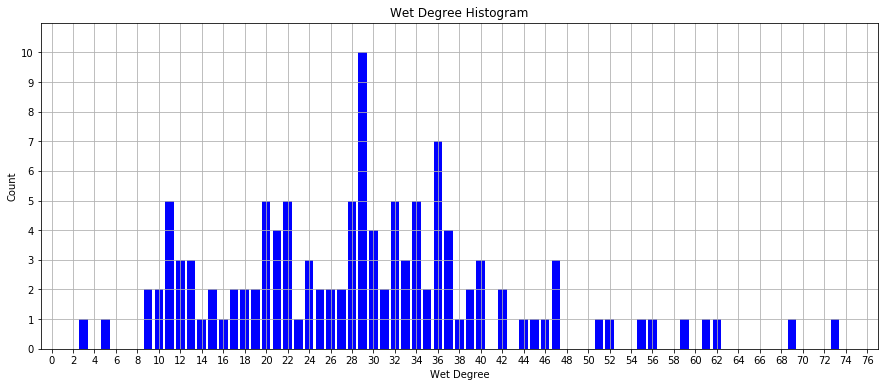

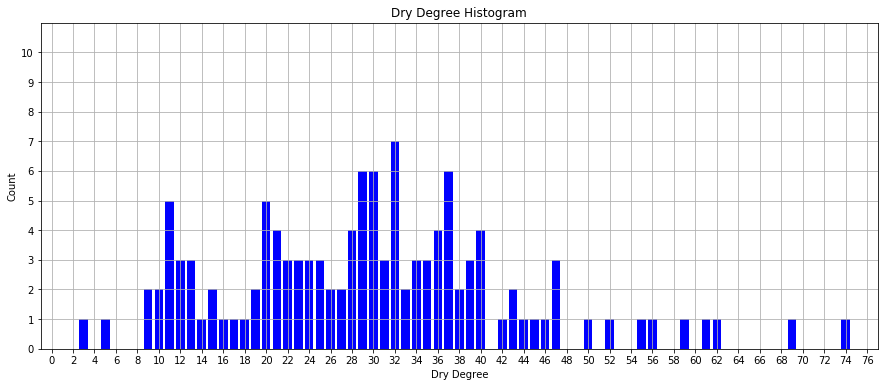

In [5]:
# 这里还可以分out_degree 和in_degree 的统计！

degree_sequence_wet = sorted([d for n, d in G_wet.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = Counter(degree_sequence_wet)
deg, cnt = zip(*degreeCount.items())

#fig, ax = plt.subplots()
plt.figure(3,figsize=(15,6)) 
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Wet Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Wet Degree")
#ax.set_xticks([d + 0.4 for d in deg])
#ax.set_xticklabels(deg)
plt.xlim((-1, 77))
plt.ylim((0, 11))

my_x_ticks = np.arange(0, 77, 2)
my_y_ticks = np.arange(0, 11, 1)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.grid()
plt.show()

degree_sequence_dry = sorted([d for n, d in G_dry.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = Counter(degree_sequence_dry)
deg, cnt = zip(*degreeCount.items())

#fig, ax = plt.subplots()
plt.figure(3,figsize=(15,6)) 
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Dry Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Dry Degree")
#ax.set_xticks([d + 0.4 for d in deg])
#ax.set_xticklabels(deg)
plt.xlim((-1, 77))
plt.ylim((0, 11))

plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)

plt.grid()
plt.show()

In [6]:
#这里还可以分out_degree 和in_degree 的统计！
wet_degrees = dict(G_wet.degree())
dry_degrees = dict(G_dry.degree())

print("G_wet sum degree:",sum(wet_degrees.values()))
print("G_dry sum degree:",sum(dry_degrees.values()))
print('\n')

print("G_wet average degree:",round(mean(wet_degrees.values()),2))
print("G_dry average degree:",round(mean(dry_degrees.values()),2))
print('\n')

print("G_wet degree standard deviation:",round(stdev(wet_degrees.values()),2))
print("G_dry degree standard deviation:",round(stdev(dry_degrees.values()),2))
print('\n')

G_wet sum degree: 3534
G_dry sum degree: 3598


G_wet average degree: 29.21
G_dry average degree: 29.74


G_wet degree standard deviation: 13.3
G_dry degree standard deviation: 13.36




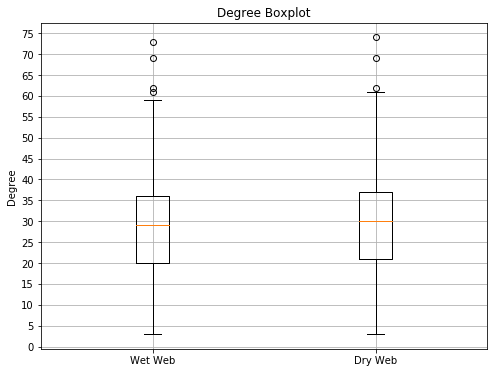

In [7]:
#degree 箱图 【wet,dry】
#fig = plt.figure();
plt.figure(figsize=(8,6))
my_y_ticks = np.arange(0, 120, 5)
plt.yticks(my_y_ticks)
plt.ylabel("Degree")
plt.boxplot([list(wet_degrees.values()),list(dry_degrees.values())],
            labels=('Wet Web','Dry Web'))
plt.title("Degree Boxplot")
plt.grid()
plt.show()

In [8]:
wet_degrees_in = dict(G_wet.in_degree());
print(sum(wet_degrees_in.values()))    #总入度

# 入度最大的物种（吃的食物种类最多的物种）
sorted_wet_in = sorted(wet_degrees_in.items(), key=lambda kv: kv[1])
print(sorted_wet_in[-1])

print(species[sorted_wet_in[-1][0]])

#id:117; in_degree:39
print('\n')

wet_degrees_out = dict(G_wet.out_degree());
print(sum(wet_degrees_out.values()))

# 出度最大的物种（被吃最多的物种）
sorted_wet_out = sorted(wet_degrees_out.items(), key=lambda kv: kv[1])
print(sorted_wet_out[-1])

print(species[sorted_wet_out[-1][0]])

#id:44; out_degree:60

1767
(117, 39)
Crocodiles


1767
(44, 60)
Predatory Shrimp


In [9]:
dry_degrees_in = dict(G_dry.in_degree());
print(sum(dry_degrees_in.values()))

# 入度最大的物种（吃的食物种类最多的物种）
sorted_dry_in = sorted(dry_degrees_in.items(), key=lambda kv: kv[1])
print(sorted_dry_in[-3])

#species = nx.get_node_attributes(G_dry, 'name')
print(species[sorted_dry_in[-3][0]])

#id:117; out_degree:39
print('\n')


dry_degrees_out = dict(G_dry.out_degree());
print(sum(dry_degrees_out.values()))

# 出度最大的物种（被吃最多的物种）
sorted_dry_out = sorted(dry_degrees_out.items(), key=lambda kv: kv[1])
print(sorted_dry_out[-1])

#species = nx.get_node_attributes(G_dry, 'name')
print(species[sorted_dry_out[-1][0]])

#id:44; out_degree:61

1799
(117, 39)
Crocodiles


1799
(44, 61)
Predatory Shrimp


6
[(75, 104), (81, 118), (89, 102), (99, 103), (99, 105), (99, 117)]


{'Pelagic Fishes': [99], 'Unknown': [102, 103, 104, 105, 75, 81, 117, 118, 89]}


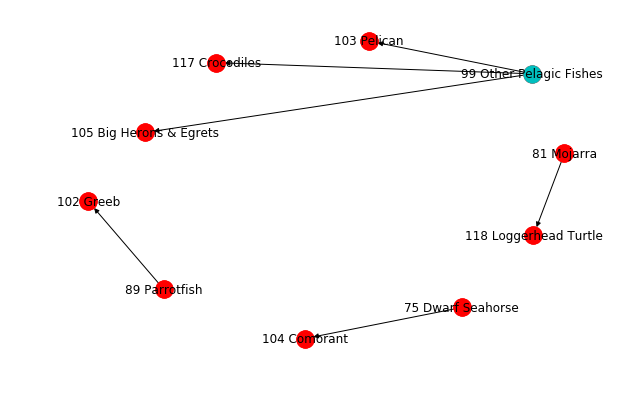

In [10]:
# wet有 dry没有的边
wet_only_e=[]
for e in G_wet.edges():
    if e not in G_dry.edges():
        wet_only_e.append(e)
        
print(len(wet_only_e))
print(wet_only_e)

G_wet_only = G_wet.edge_subgraph(wet_only_e)
#G_dry_only.degree()
species_wet_only = nx.get_node_attributes(G_wet_only, 'name')
groups_wet_only = nx.get_node_attributes(G_wet_only, 'group')

print('\n')

wet_id_name={}
for key in species_wet_only:
    wet_id_name[key] = str(key)+' '+species_wet_only[key]
    
class_wet = {}
for k, v in groups_wet_only.items():
    if v in class_wet:
        class_wet[v].append(k)
    else:
        class_wet[v] = [k]
print(class_wet)

wet_node_group=list(class_wet.values())

# 红色的点 物种类别是unknown

pos = nx.spring_layout(G_wet_only)
"""
plt.figure(3,figsize=(9,5)) 
nx.draw(G_wet_only, pos,with_labels=True)
nx.draw_networkx_nodes(G_wet_only, pos, nodelist=wet_node_group[0], node_color='c')
nx.draw_networkx_nodes(G_wet_only, pos, nodelist=wet_node_group[1], node_color='r')
plt.show()
"""
plt.figure(3,figsize=(8,5)) 
nx.draw(G_wet_only, pos,labels=wet_id_name,with_labels=True)
nx.draw_networkx_nodes(G_wet_only, pos, nodelist=wet_node_group[0], node_color='c')
nx.draw_networkx_nodes(G_wet_only, pos, nodelist=wet_node_group[1], node_color='r')
plt.show()

38
[(18, 66), (19, 66), (20, 66), (21, 66), (22, 66), (22, 99), (23, 66), (44, 66), (60, 105), (60, 121), (63, 105), (64, 105), (65, 105), (65, 121), (67, 102), (67, 103), (67, 104), (67, 105), (67, 107), (67, 108), (67, 116), (71, 104), (71, 105), (75, 103), (75, 105), (78, 112), (80, 105), (80, 121), (83, 101), (83, 103), (83, 104), (83, 111), (83, 112), (83, 117), (83, 121), (91, 105), (94, 29), (95, 121)]


{'Zooplankton Microfauna': [18, 19, 20, 21, 22, 23], 'Macroinvertebrates': [29, 44], 'Benthic Fishes': [60, 63, 94, 95], 'Demersal Fishes': [64], 'Pelagic Fishes': [65, 66, 91, 99], 'Unknown': [67, 71, 75, 78, 80, 83, 101, 102, 103, 104, 105, 107, 108, 111, 112, 116, 117, 121]}


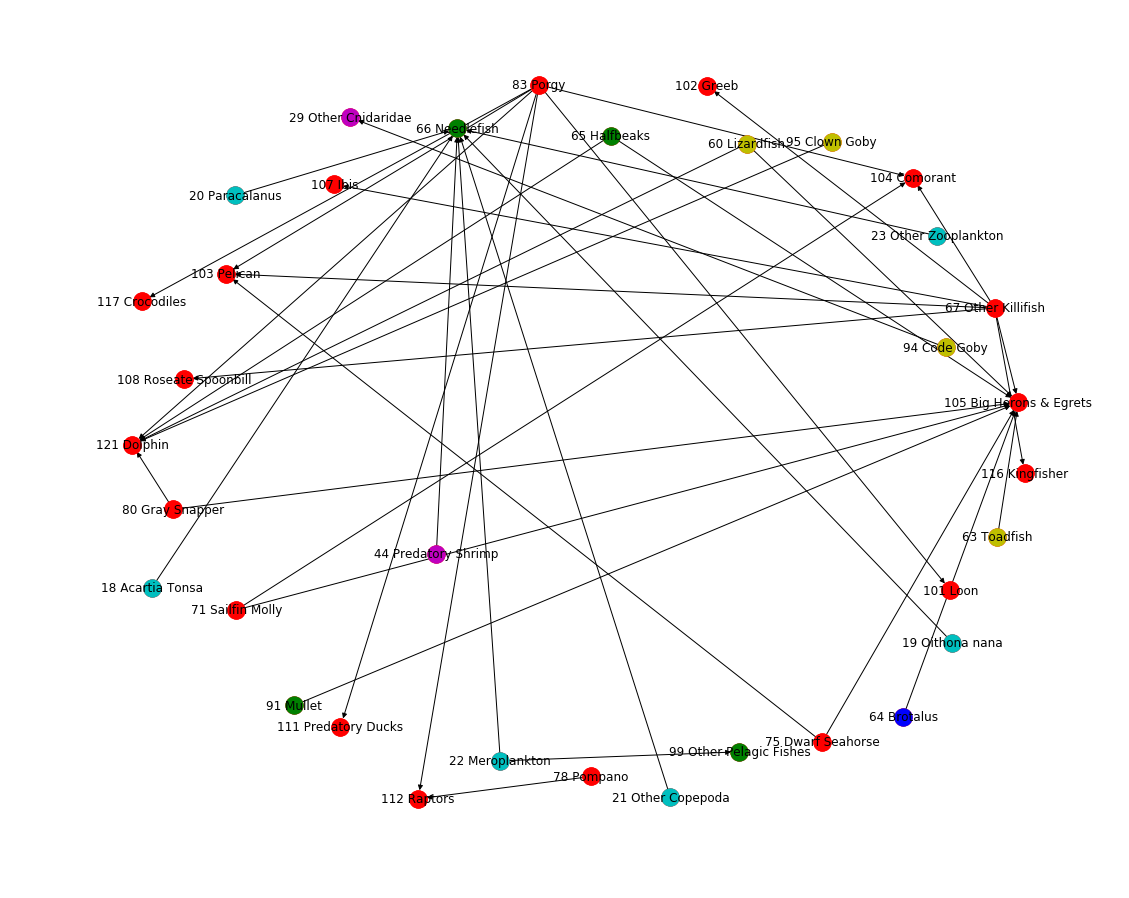

In [11]:
# dry有 wet没有的边
dry_only_e=[]
for e in G_dry.edges():
    if e not in G_wet.edges():
        dry_only_e.append(e)

print(len(dry_only_e))
print(dry_only_e)

G_dry_only = G_dry.edge_subgraph(dry_only_e)
#G_dry_only.degree()
species_dry_only = nx.get_node_attributes(G_dry_only, 'name')
groups_dry_only = nx.get_node_attributes(G_dry_only, 'group')

print('\n')
dry_id_name={}
for key in species_dry_only:
    dry_id_name[key] = str(key)+' '+species_dry_only[key]
    
class_dry = {}
for k, v in groups_dry_only.items():
    if v in class_dry:
        class_dry[v].append(k)
    else:
        class_dry[v] = [k]
print(class_dry)

dry_node_group=list(class_dry.values())
#print(len(dry_node_group))

# 红色的点 物种类别是unknown

pos_dry = nx.spring_layout(G_dry_only)

plt.figure(3,figsize=(15,12)) 
nx.draw(G_dry_only, pos_dry,labels=dry_id_name,with_labels=True)
nx.draw_networkx_nodes(G_dry_only, pos_dry, nodelist=dry_node_group[0], node_color='c')
nx.draw_networkx_nodes(G_dry_only, pos_dry, nodelist=dry_node_group[1], node_color='m')
nx.draw_networkx_nodes(G_dry_only, pos_dry, nodelist=dry_node_group[2], node_color='y')
nx.draw_networkx_nodes(G_dry_only, pos_dry, nodelist=dry_node_group[3], node_color='b')
nx.draw_networkx_nodes(G_dry_only, pos_dry, nodelist=dry_node_group[4], node_color='g')
nx.draw_networkx_nodes(G_dry_only, pos_dry, nodelist=dry_node_group[5], node_color='r')
plt.show()

In [12]:
# Algebraic connectivity
# The second-smallest eigenvalue of the Laplacian matrix of G
# Algebraic connectivity is greater than 0 if and only if G is a connected graph
# The magnitude of this value reflects how well connected the overall graph is
"""
m_wet = nx.directed_laplacian_matrix(G_wet)
spectrum_wet = np.linalg.eigvals(m_wet)

sort_eigen_wet = sorted(spectrum_wet)
#sort_eigen_wet[0:5]
print("G_wet Algebraic Connectivity:",sort_eigen_wet[1])


m_dry = nx.directed_laplacian_matrix(G_dry)
spectrum_dry = np.linalg.eigvals(m_dry)

sort_eigen_dry = sorted(spectrum_dry)
#sort_eigen_dry[0:5]
print("G_dry Algebraic Connectivity:",sort_eigen_dry[1])
"""

'\nm_wet = nx.directed_laplacian_matrix(G_wet)\nspectrum_wet = np.linalg.eigvals(m_wet)\n\nsort_eigen_wet = sorted(spectrum_wet)\n#sort_eigen_wet[0:5]\nprint("G_wet Algebraic Connectivity:",sort_eigen_wet[1])\n\n\nm_dry = nx.directed_laplacian_matrix(G_dry)\nspectrum_dry = np.linalg.eigvals(m_dry)\n\nsort_eigen_dry = sorted(spectrum_dry)\n#sort_eigen_dry[0:5]\nprint("G_dry Algebraic Connectivity:",sort_eigen_dry[1])\n'

Roubtness

Dry

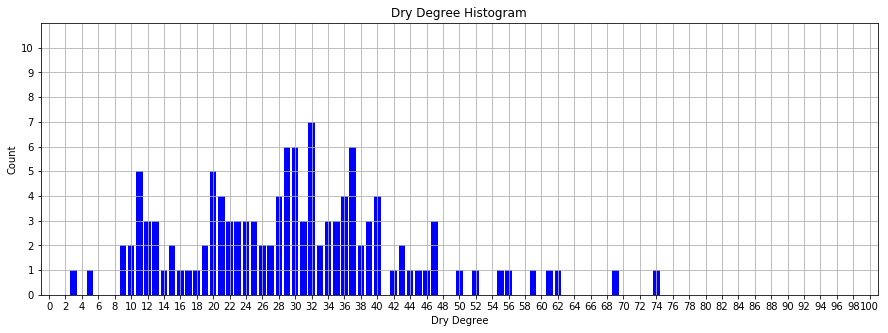

In [13]:
# 这里还可以分out_degree 和in_degree 的统计！
degree_sequence_dry = sorted([d for n, d in G_dry.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = Counter(degree_sequence_dry)
deg, cnt = zip(*degreeCount.items())

#fig, ax = plt.subplots()
plt.figure(3,figsize=(15,5)) 
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Dry Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Dry Degree")
#ax.set_xticks([d + 0.4 for d in deg])
#ax.set_xticklabels(deg)
plt.xlim((-1, 101))
plt.ylim((0, 11))

my_x_ticks = np.arange(0, 101, 2)
my_y_ticks = np.arange(0, 11, 1)

plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)

plt.grid()
plt.show()

Wet

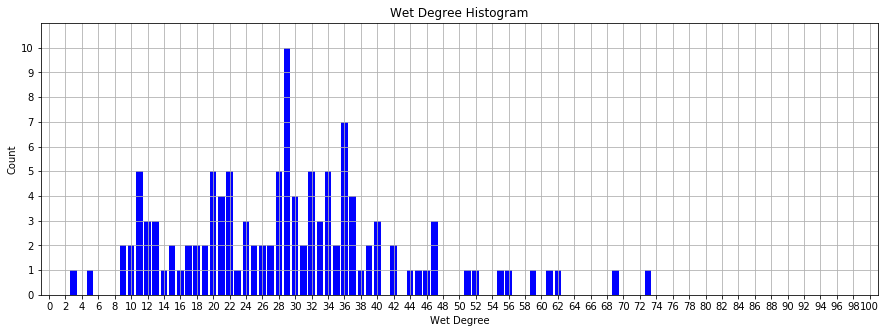

In [14]:
degree_sequence_wet = sorted([d for n, d in G_wet.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = Counter(degree_sequence_wet)
deg, cnt = zip(*degreeCount.items())

#fig, ax = plt.subplots()
plt.figure(3,figsize=(15,5)) 
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Wet Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Wet Degree")
#ax.set_xticks([d + 0.4 for d in deg])
#ax.set_xticklabels(deg)
plt.xlim((-1, 101))
plt.ylim((0, 11))

my_x_ticks = np.arange(0, 101, 2)
my_y_ticks = np.arange(0, 11, 1)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.grid()
plt.show()

Dry

In [15]:
Degree_dry = []
for i in G_dry.node():
    Degree_dry.append(G_dry.degree(i))

squared_degree_dry = []
for i in G_dry.node():
    degree = G_dry.degree(i)
    square = degree * degree
    squared_degree_dry.append(square)

In [16]:
G_dry_average_degree = (sum(Degree_dry)/len(Degree_dry))
G_dry_average_squared_degree = (sum(squared_degree_dry)/len(squared_degree_dry))

In [17]:
fc = 1- (G_dry_average_degree / (G_dry_average_squared_degree - G_dry_average_degree))
print('the critical threshold is:',fc)

the critical threshold is: 0.9711726436560587


In [18]:
G_copy1 = G_dry.copy()

In [19]:
total = G_copy1.number_of_nodes()
G_giant1 = max(nx.strongly_connected_component_subgraphs(G_copy1), key=len)

In [20]:
Fraction_dry = []
fraction = 0
for i in range(1,101):
    nodesremoved = []
    G_copy1 = G_dry.copy()
    G_giant1 = max(nx.strongly_connected_component_subgraphs(G_copy1), key=len)
    while len(G_giant1) > 3:
        List = random.sample(G_copy1.node(),1)
        G_copy1.remove_node(List[0])
        nodesremoved.append(List)
        G_giant1 = max(nx.strongly_connected_component_subgraphs(G_copy1), key=len)
    fraction = len(nodesremoved) / total
    Fraction_dry.append(fraction)

In [21]:
Average_Fraction_dry = sum(Fraction_dry)/len(Fraction_dry)
Average_Fraction_dry

0.4695867768595041

Wet

In [22]:
Degree_wet = []
for i in G_wet.node():
    Degree_wet.append(G_wet.degree(i))

squared_degree_wet = []
for i in G_wet.node():
    degree = G_wet.degree(i)
    square = degree * degree
    squared_degree_wet.append(square)

In [23]:
G_wet_average_degree = (sum(Degree_wet)/len(Degree_wet))
G_wet_average_squared_degree = (sum(squared_degree_wet)/len(squared_degree_wet))

In [24]:
fc = 1- (G_wet_average_degree / (G_wet_average_squared_degree - G_wet_average_degree))
print('the critical threshold is:',fc)

the critical threshold is: 0.9707677800387116


In [25]:
total_wet = G_wet.number_of_nodes()
Fraction_wet = []
fraction = 0
for i in range(1,101):
    nodesremoved = []
    G_copy2 = G_wet.copy()
    G_giant2 = max(nx.strongly_connected_component_subgraphs(G_copy2), key=len)
    while len(G_giant2) > 3:
        List = random.sample(G_copy2.node(),1)
        G_copy2.remove_node(List[0])
        nodesremoved.append(List)
        G_giant2 = max(nx.strongly_connected_component_subgraphs(G_copy2), key=len)
    fraction = len(nodesremoved) / total_wet
    Fraction_wet.append(fraction)

In [26]:
Average_Fraction_wet = sum(Fraction_wet)/len(Fraction_wet)
Average_Fraction_wet

0.47099173553719004

通过初步的比较，可以看出，dry数据集中的网络比wet数据集中的网络更加稳定。Average_Fraction这个值越小，说明破坏这个网络所需的移除的节点数目越小，网络越不稳定。

干的和湿的环境下，在不考虑能量流动给物种灭绝带来的影响下，随机选择物种灭绝，在最大连通域不大于3个点时认为food web网络瘫痪。进行100次模拟得到的两种不同环境下的数值，发现基本一致。但让能初步判断，dry网络更加稳定。结果差距不大，表明，两者的稳定性受环境影响的程度较小，食物链的网络结构也基本一致。

二. 开始考虑数据集中权重的意义。 将引入一个参数t来表示： 当流入生物的能量为原来的 t% 时, 生物将无法继续生存。
+ we assumed that consumers cannot switch from one type of prey to another (i.e. no food web “rewiring”) 即假设物种j的能量来源为a,b,c。当a灭绝后，从b和c流入j的能量将维持不变（现实生活中，从b和c流入的能量将会增大以维持j的生存，这样分析网络将会极为困难，并且数据集并未提供此类的数据，我们无法预估比例的变化）

Dry

+ Dry数据集下，先计算各个节点的初始流入能量。数据集中存在进度为0的点（1-14），它们为是食物网的能量提供者，我们将不会在计算能量流动的过程中删去这些点。但是它们可以在初始对食物网进行灭绝干扰时删去。

In [27]:
consumer = []
theweight = {}
for u,v in G_dry.edges():
    weight = G_dry.get_edge_data(u,v)['weight']
    if v not in consumer:
        consumer.append(v)
        theweight[v] = weight
    else:
        theweight[v] = theweight[v] + weight    

+ 接下来便计算带权重的食物网的稳定性。
+ 初始删去n个点
+ 计算新网络下，各个点的流入能量。如有节点的流入能量低于原来的t %，删去该节点，即表示该物种灭绝
+ 同时需要删去某些点。这些点实在屡次计算流入能量时被忽视的点。比如，存在i ->j -> x. 节点j仅有唯一进度节点i。theweight是一个字典，存储为{节点：流入能量}。当i未被删除时，j会是一个key在theweight里且j不会被删除因为i提供100%能量给j。当i灭绝后，j理应灭绝。此时，theweight里j就不是key了。删除此类节点就是比较新旧theweight的key。不存在与旧theweight里的key即为该类节点

In [28]:
total_dry = G_dry.number_of_nodes()

+ 研究初始物种灭绝的数量 n 对食物网带来的影响

In [53]:
Average_Fraction_dry_weight_20 = []
for n in range(1,21):
    Fraction_dry_weight = []
    fraction = 0
    for i in range(1,101):
        nodesremoved = []
        G_copy3 = G_dry.copy()
        List = random.sample(G_copy3.node(),n) ## 随机去除一个点，会导致，对其他节点的能量流入的影响很小。
        for i in List:       
            G_copy3.remove_node(i)
            nodesremoved.append(i)
                
        T = True
        while T:
            consumer_dry = []
            remove = []
            theweight_dry = {}
            for u,v in G_copy3.edges():
                weight = G_copy3.get_edge_data(u,v)['weight']
                if v not in consumer_dry:
                    consumer_dry.append(v)
                    theweight_dry[v] = weight
                else:
                    theweight_dry[v] = theweight_dry[v] + weight

            for key in theweight_dry.keys():    # 删除那些没有能量来源的点。比如，i -> j -> x。 theweight里会有key为j和x的点。当删去了i时，j没有了能量来源，理应gg，所以新的theweight里，j就不作为key了                     
                if key not in theweight.keys(): # 因为i -> j 这个edge断了，所以，就不会有（u，v），theweight[v]了。
                    nodesremoved.append(key)    # 这里面没有删去1-14号生物，因为他们是基底生物，没有能量流入他们，所以不出现在theweight里。
                    G_copy3.remove_node(key)
                    

            for key in theweight_dry.keys():         
                if theweight_dry[key]/theweight[key] < 0.6:                     
                    remove.append(key)



            if len(remove) != 0:
                for i in remove:
                    G_copy3.remove_node(i)
                    nodesremoved.append(i) 
                      

            else:
                T = False
                              
    
        fraction = len(nodesremoved) / total_dry
        Fraction_dry_weight.append(fraction)
    Average_Fraction_dry_weight = sum(Fraction_dry_weight)/len(Fraction_dry_weight)
    Average_Fraction_dry_weight_20.append(Average_Fraction_dry_weight)

No handles with labels found to put in legend.


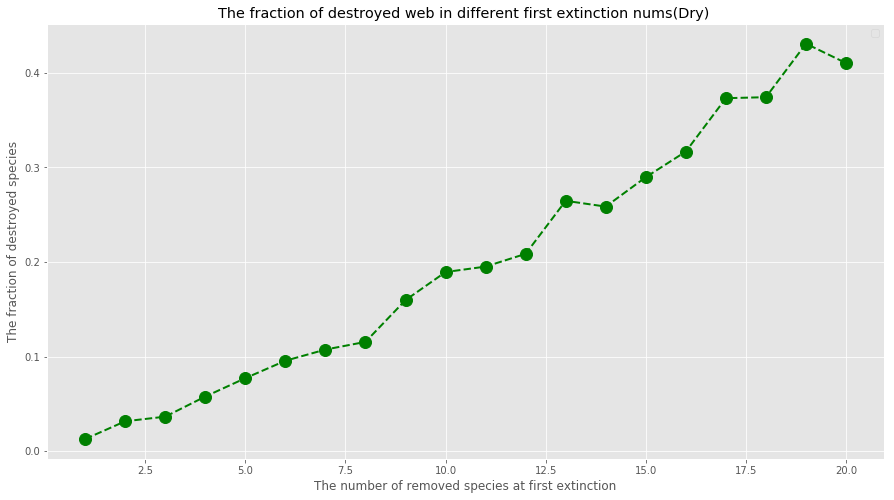

In [54]:
n = []
for i in range(1,21):
    n.append(i)
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.title("The fraction of destroyed web in different first extinction nums(Dry) ")
plt.xlabel("The number of removed species at first extinction")
plt.ylabel("The fraction of destroyed species")
plt.plot(n,Average_Fraction_dry_weight_20,'go--', linewidth=2, markersize=12)
plt.legend()
plt.grid(True)

+ 结论很明显，在t为0.9不变的情况下，当第一次物种灭绝数量越大，即n越大，食物网就会删去的更多的，表明第一次物种灭绝的数量会影响食物网的稳定性
+ 当n>10时，70%的节点被删除，即70%的网络崩溃。n >5时，50%的网络崩溃
+ 分析：让5种物种同时灭绝的事件很罕见，侧面反映出该网络稳定性很强，抵抗攻击的能力比较强

+ 讨论threshold的取值会给网络稳定性带来的反应，可以从0.1-0.9

In [48]:
Average_Fraction_dry_weight_t = []
threshold =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for t in threshold:
    Fraction_dry_weight = []
    fraction = 0
    for i in range(1,101):
        nodesremoved = []
        G_copy4 = G_dry.copy()
        List = random.sample(G_copy4.node(),5) ## 随机去除五个点，会导致，对其他节点的能量流入的影响很小。
        for i in List:       
            G_copy4.remove_node(i)
            nodesremoved.append(i)
                
        T = True
        while T:
            consumer_dry = []
            remove = []
            theweight_dry = {}
            for u,v in G_copy4.edges():
                weight = G_copy4.get_edge_data(u,v)['weight']
                if v not in consumer_dry:
                    consumer_dry.append(v)
                    theweight_dry[v] = weight
                else:
                    theweight_dry[v] = theweight_dry[v] + weight

            for key in theweight_dry.keys():    # 删除那些没有能量来源的点。比如，i -> j -> x。 theweight里会有key为j和x的点。当删去了i时，j没有了能量来源，理应gg，所以新的theweight里，j就不作为key了                     
                if key not in theweight.keys(): # 因为i -> j 这个edge断了，所以，就不会有（u，v），theweight[v]了。
                    nodesremoved.append(key)    # 这里面没有删去1-14号生物，因为他们是基底生物，没有能量流入他们，所以不出现在theweight里。
                    G_copy4.remove_node(key)
                    

            for key in theweight_dry.keys():         
                if theweight_dry[key]/theweight[key] < t:                     
                    remove.append(key)



            if len(remove) != 0:
                for i in remove:
                    G_copy4.remove_node(i)
                    nodesremoved.append(i) 
                      

            else:
                T = False
                              
    
        fraction = len(nodesremoved) / total_dry
        Fraction_dry_weight.append(fraction)
    Average_Fraction_dry_weight = sum(Fraction_dry_weight)/len(Fraction_dry_weight)
    Average_Fraction_dry_weight_t.append(Average_Fraction_dry_weight)

No handles with labels found to put in legend.


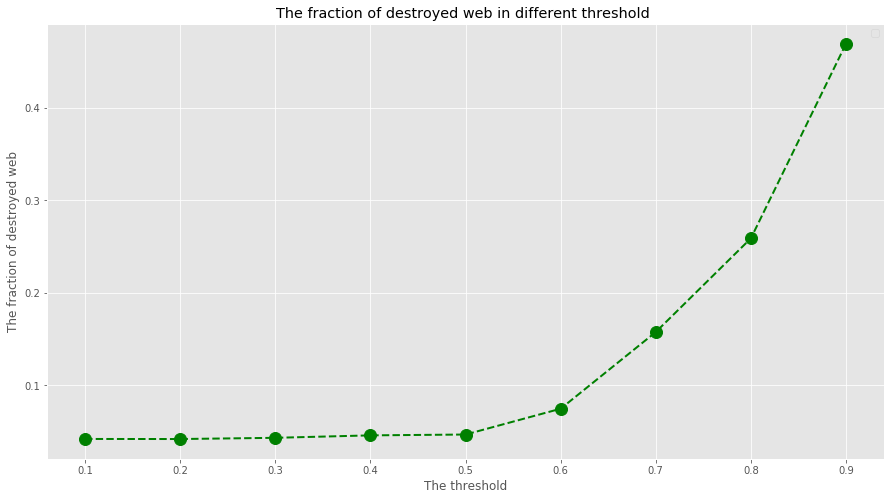

In [49]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.title("The fraction of destroyed web in different threshold ")
plt.xlabel("The threshold")
plt.ylabel("The fraction of destroyed web")
plt.plot(threshold,Average_Fraction_dry_weight_t,'go--', linewidth=2, markersize=12)
plt.legend()
plt.grid(True)


+ 当第一次物种灭绝的数量为5时，生物所需的能量比例会影响网络的稳定。当threshold越大，即物种维持生存的能量比例越大时，网络被破坏的约严重。
+ 当t=0.6时，网络中被移除的点低于10%。一般流入某一物种的能量变为原来的60%时，不足以使得该物种灭绝。而我们假定为60%时变灭绝，条件更为严苛，表明该网络抵抗攻击的能力很强，网络稳定性较强。

+ 研究n和v同时在变时，网络的走势

In [37]:
Average_Fraction_dry_weight_20_t = []
for n in range(1,21):
    Average_Fraction_dry_weight_t = []
    threshold =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for t in threshold:
        Fraction_dry_weight = []
        fraction = 0
        for i in range(1,101):
            nodesremoved = []
            G_copy5 = G_dry.copy()
            List = random.sample(G_copy5.node(),n) ## 随机去除一个点，会导致，对其他节点的能量流入的影响很小。
            for i in List:       
                G_copy5.remove_node(i)
                nodesremoved.append(i)
                
            T = True
            while T:
                consumer_dry = []
                remove = []
                theweight_dry = {}
                for u,v in G_copy5.edges():
                    weight = G_copy5.get_edge_data(u,v)['weight']
                    if v not in consumer_dry:
                        consumer_dry.append(v)
                        theweight_dry[v] = weight
                    else:
                        theweight_dry[v] = theweight_dry[v] + weight

                for key in theweight_dry.keys():    # 删除那些没有能量来源的点。比如，i -> j -> x。 theweight里会有key为j和x的点。当删去了i时，j没有了能量来源，理应gg，所以新的theweight里，j就不作为key了                     
                    if key not in theweight.keys(): # 因为i -> j 这个edge断了，所以，就不会有（u，v），theweight[v]了。
                        nodesremoved.append(key)    # 这里面没有删去1-14号生物，因为他们是基底生物，没有能量流入他们，所以不出现在theweight里。
                        G_copy5.remove_node(key)
                    

                for key in theweight_dry.keys():         
                    if theweight_dry[key]/theweight[key] < t:                     
                        remove.append(key)



                if len(remove) != 0:
                    for i in remove:
                        G_copy5.remove_node(i)
                        nodesremoved.append(i) 
                      

                else:
                    T = False
                              
    
            fraction = len(nodesremoved) / total_dry
            Fraction_dry_weight.append(fraction)
        Average_Fraction_dry_weight = sum(Fraction_dry_weight)/len(Fraction_dry_weight)
        Average_Fraction_dry_weight_t.append(Average_Fraction_dry_weight)
    Average_Fraction_dry_weight_20_t.append(Average_Fraction_dry_weight_t)

There are 20 lists and each list has nine fraction.When n =1, t = 0.1-0.9,the fraction of nodes removed. When n=2,t = 0.1-0.9,the fraction of nodes removed...

In [38]:
the_fraction1 = []
the_fraction2 = []
the_fraction3 = []
the_fraction4 = []
the_fraction5 = []
the_fraction6 = []
the_fraction7 = []
the_fraction8 = []
the_fraction9 = []
for List in Average_Fraction_dry_weight_20_t:
        the_fraction1.append(List[0])
        the_fraction2.append(List[1])
        the_fraction3.append(List[2])
        the_fraction4.append(List[3])
        the_fraction5.append(List[4])
        the_fraction6.append(List[5])
        the_fraction7.append(List[6])
        the_fraction8.append(List[7])
        the_fraction9.append(List[8])

In [39]:
num = []
for i in range(1,21):
    num.append(i)

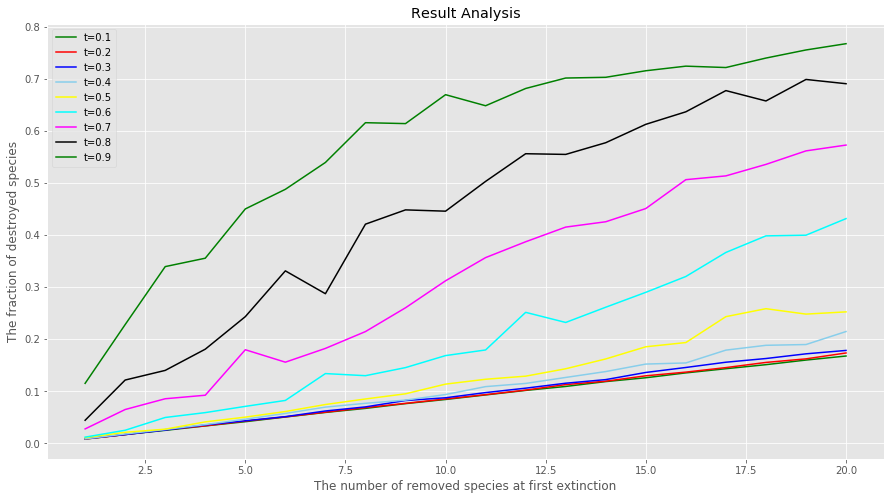

In [60]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.title('Result Analysis')
plt.plot(num,the_fraction1,color='green', label='t=0.1')
plt.plot(num,the_fraction2,color='red', label='t=0.2')
plt.plot(num,the_fraction3,color='blue', label='t=0.3')
plt.plot(num,the_fraction4,color='skyblue', label='t=0.4')
plt.plot(num,the_fraction5,color='yellow', label='t=0.5')
plt.plot(num,the_fraction6,color='cyan', label='t=0.6')
plt.plot(num,the_fraction7,color='magenta', label='t=0.7')
plt.plot(num,the_fraction8,color='black', label='t=0.8')
plt.plot(num,the_fraction9,color='green', label='t=0.9')
plt.legend()
 
plt.xlabel('The number of removed species at first extinction')
plt.ylabel('The fraction of destroyed species')
plt.show()

+ 网络的稳定性会受到n和t的影响，根据上图，可以明显看到。当t>0.6时，整个网络的破坏程度开始大幅度增加。表明大多数生物对上层生物的能量贡献率在40%以下

以上的是对于dry网络的roubutness的分析。

Wet

对wet数据集分析的方法与分析dry的方法一致

In [41]:
consumer2 = []
theweight2 = {}
for u,v in G_wet.edges():
    weight = G_wet.get_edge_data(u,v)['weight']
    if v not in consumer2:
        consumer2.append(v)
        theweight2[v] = weight
    else:
        theweight2[v] = theweight2[v] + weight  

In [42]:
total_wet = G_wet.number_of_nodes()

+ 研究初始物种灭绝的数量 n 对食物网带来的影响

In [55]:
Average_Fraction_wet_weight_20 = []
for n in range(1,21):
    Fraction_wet_weight = []
    fraction = 0
    for i in range(1,101):
        nodesremoved = []
        G_copy6 = G_wet.copy()
        List = random.sample(G_copy6.node(),n) ## 随机去除一个点，会导致，对其他节点的能量流入的影响很小。
        for i in List:       
            G_copy6.remove_node(i)
            nodesremoved.append(i)
                
        T = True
        while T:
            consumer_wet = []
            remove = []
            theweight_wet = {}
            for u,v in G_copy6.edges():
                weight = G_copy6.get_edge_data(u,v)['weight']
                if v not in consumer_wet:
                    consumer_wet.append(v)
                    theweight_wet[v] = weight
                else:
                    theweight_wet[v] = theweight_wet[v] + weight

            for key in theweight_wet.keys():    # 删除那些没有能量来源的点。比如，i -> j -> x。 theweight里会有key为j和x的点。当删去了i时，j没有了能量来源，理应gg，所以新的theweight里，j就不作为key了                     
                if key not in theweight2.keys(): # 因为i -> j 这个edge断了，所以，就不会有（u，v），theweight[v]了。
                    nodesremoved.append(key)    # 这里面没有删去1-14号生物，因为他们是基底生物，没有能量流入他们，所以不出现在theweight里。
                    G_copy6.remove_node(key)
                    

            for key in theweight_wet.keys():         
                if theweight_wet[key]/theweight2[key] < 0.6:                     
                    remove.append(key)



            if len(remove) != 0:
                for i in remove:
                    G_copy6.remove_node(i)
                    nodesremoved.append(i) 
                      

            else:
                T = False
                              
    
        fraction = len(nodesremoved) / total_wet
        Fraction_wet_weight.append(fraction)
    Average_Fraction_wet_weight = sum(Fraction_wet_weight)/len(Fraction_wet_weight)
    Average_Fraction_wet_weight_20.append(Average_Fraction_wet_weight)

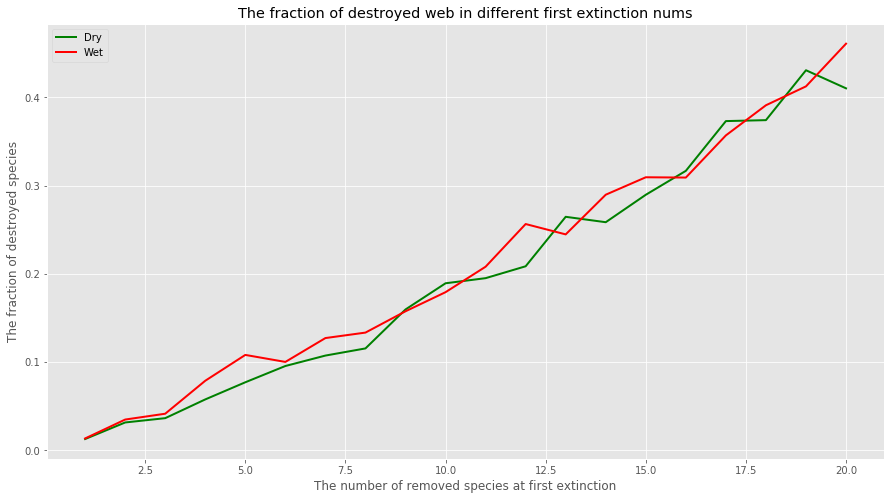

In [56]:
n_wet = []
for i in range(1,21):
    n_wet.append(i)
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.title("The fraction of destroyed web in different first extinction nums")
plt.xlabel("The number of removed species at first extinction")
plt.ylabel("The fraction of destroyed species")
plt.plot(n_wet,Average_Fraction_dry_weight_20,'g',linewidth=2, markersize=12,label = 'Dry')
plt.plot(n_wet,Average_Fraction_wet_weight_20,'r',linewidth=2, markersize=12,label = 'Wet')
plt.legend()
plt.grid(True)

+ 大体上，两者的网络破坏程度都是随着n越大而越严重。
+ 对比Dry和Wet两者对于n的结果，两者网络的被破坏程度大致相同但仍有细微的区别。相比之下，Wet的网络更加稳定，因为表示Wet的线大都在Dry线的下方

+ 讨论threshold的取值会给网络稳定性带来的反应，可以从0.1-0.9

In [57]:
Average_Fraction_wet_weight_t = []
threshold =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for t in threshold:
    Fraction_wet_weight = []
    fraction = 0
    for i in range(1,101):
        nodesremoved = []
        G_copy7 = G_wet.copy()
        List = random.sample(G_copy7.node(),5) ## 随机去除五个点，会导致，对其他节点的能量流入的影响很小。
        for i in List:       
            G_copy7.remove_node(i)
            nodesremoved.append(i)
                
        T = True
        while T:
            consumer_wet = []
            remove = []
            theweight_wet = {}
            for u,v in G_copy7.edges():
                weight = G_copy7.get_edge_data(u,v)['weight']
                if v not in consumer_wet:
                    consumer_wet.append(v)
                    theweight_wet[v] = weight
                else:
                    theweight_wet[v] = theweight_wet[v] + weight

            for key in theweight_wet.keys():    # 删除那些没有能量来源的点。比如，i -> j -> x。 theweight里会有key为j和x的点。当删去了i时，j没有了能量来源，理应gg，所以新的theweight里，j就不作为key了                     
                if key not in theweight2.keys(): # 因为i -> j 这个edge断了，所以，就不会有（u，v），theweight[v]了。
                    nodesremoved.append(key)    # 这里面没有删去1-14号生物，因为他们是基底生物，没有能量流入他们，所以不出现在theweight里。
                    G_copy7.remove_node(key)
                    

            for key in theweight_wet.keys():         
                if theweight_wet[key]/theweight2[key] < t:                     
                    remove.append(key)



            if len(remove) != 0:
                for i in remove:
                    G_copy7.remove_node(i)
                    nodesremoved.append(i) 
                      

            else:
                T = False
                              
    
        fraction = len(nodesremoved) / total_wet
        Fraction_wet_weight.append(fraction)
    Average_Fraction_wet_weight = sum(Fraction_wet_weight)/len(Fraction_wet_weight)
    Average_Fraction_wet_weight_t.append(Average_Fraction_wet_weight)

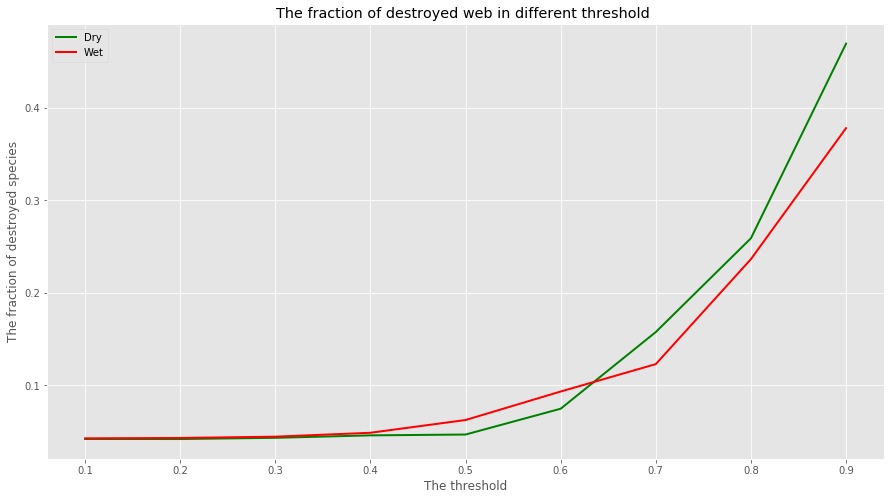

In [59]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.title("The fraction of destroyed web in different threshold ")
plt.xlabel("The threshold")
plt.ylabel("The fraction of destroyed species")
plt.plot(threshold,Average_Fraction_dry_weight_t,'g', linewidth=2, markersize=12,label = 'Dry')
plt.plot(threshold,Average_Fraction_wet_weight_t,'r', linewidth=2, markersize=12,label = 'Wet')
plt.legend()
plt.grid(True)

+ 在第一次灭绝物种数目为5的情况下，两个网络随着t增大，网络被破坏的程度也越严重。
+ 对比两种网络，发现两者的网络稳定性基本相同，但Dry大部分在Wet下面，可以分析出Wet网络每个生物对其上层生物的能量贡献率更集中在0.3-0.7这个区域

+ 研究n和v同时在变时，网络的走势

In [95]:
Average_Fraction_wet_weight_20_t = []
for n in range(1,21):
    Average_Fraction_wet_weight_t = []
    threshold =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for t in threshold:
        Fraction_wet_weight = []
        fraction = 0
        for i in range(1,101):
            nodesremoved = []
            G_copy8 = G_wet.copy()
            List = random.sample(G_copy8.node(),n) ## 随机去除一个点，会导致，对其他节点的能量流入的影响很小。
            for i in List:       
                G_copy8.remove_node(i)
                nodesremoved.append(i)
                
            T = True
            while T:
                consumer_wet = []
                remove = []
                theweight_wet = {}
                for u,v in G_copy8.edges():
                    weight = G_copy8.get_edge_data(u,v)['weight']
                    if v not in consumer_wet:
                        consumer_wet.append(v)
                        theweight_wet[v] = weight
                    else:
                        theweight_wet[v] = theweight_wet[v] + weight

                for key in theweight_wet.keys():    # 删除那些没有能量来源的点。比如，i -> j -> x。 theweight里会有key为j和x的点。当删去了i时，j没有了能量来源，理应gg，所以新的theweight里，j就不作为key了                     
                    if key not in theweight2.keys(): # 因为i -> j 这个edge断了，所以，就不会有（u，v），theweight[v]了。
                        nodesremoved.append(key)    # 这里面没有删去1-14号生物，因为他们是基底生物，没有能量流入他们，所以不出现在theweight里。
                        G_copy8.remove_node(key)
                    

                for key in theweight_wet.keys():         
                    if theweight_wet[key]/theweight2[key] < t:                     
                        remove.append(key)



                if len(remove) != 0:
                    for i in remove:
                        G_copy8.remove_node(i)
                        nodesremoved.append(i) 
                      

                else:
                    T = False
                              
    
            fraction = len(nodesremoved) / total_wet
            Fraction_wet_weight.append(fraction)
        Average_Fraction_wet_weight = sum(Fraction_wet_weight)/len(Fraction_wet_weight)
        Average_Fraction_wet_weight_t.append(Average_Fraction_wet_weight)
    Average_Fraction_wet_weight_20_t.append(Average_Fraction_wet_weight_t)

In [96]:
the_fraction_wet1 = []
the_fraction_wet2 = []
the_fraction_wet3 = []
the_fraction_wet4 = []
the_fraction_wet5 = []
the_fraction_wet6 = []
the_fraction_wet7 = []
the_fraction_wet8 = []
the_fraction_wet9 = []
for List in Average_Fraction_wet_weight_20_t:
        the_fraction_wet1.append(List[0])
        the_fraction_wet2.append(List[1])
        the_fraction_wet3.append(List[2])
        the_fraction_wet4.append(List[3])
        the_fraction_wet5.append(List[4])
        the_fraction_wet6.append(List[5])
        the_fraction_wet7.append(List[6])
        the_fraction_wet8.append(List[7])
        the_fraction_wet9.append(List[8])

In [97]:
num_wet = []
for i in range(1,21):
    num_wet.append(i)

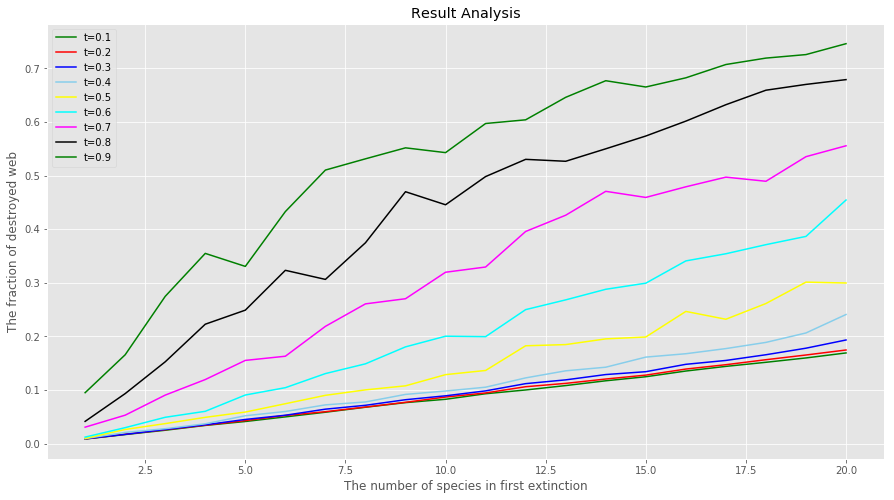

In [98]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.title('Result Analysis')
plt.plot(num_wet,the_fraction_wet1,color='green', label='t=0.1')
plt.plot(num_wet,the_fraction_wet2,color='red', label='t=0.2')
plt.plot(num_wet,the_fraction_wet3,color='blue', label='t=0.3')
plt.plot(num_wet,the_fraction_wet4,color='skyblue', label='t=0.4')
plt.plot(num_wet,the_fraction_wet5,color='yellow', label='t=0.5')
plt.plot(num_wet,the_fraction_wet6,color='cyan', label='t=0.6')
plt.plot(num_wet,the_fraction_wet7,color='magenta', label='t=0.7')
plt.plot(num_wet,the_fraction_wet8,color='black', label='t=0.8')
plt.plot(num_wet,the_fraction_wet9,color='green', label='t=0.9')
plt.legend()
 
plt.xlabel('The number of species in first extinction')
plt.ylabel('The fraction of destroyed web')
plt.show()

+ 从结果中可以得到，该食物网的网络稳定性会随着n和t变大而变差。
+ 明显的，当t>0.5时，网络的被破坏程度开始显著上升，表明t的取值对食物网的稳定性，有着显著地影响。